## DBSCAN (Density-Based Scanning)

DBSCAN is an unsupervised machine learning algorithm that groups simliar datapoints via clusters. Intrestingly, this algorithm does not define an amount of clusters to start as explained in the following:

The algorithm works by calculating the core points, which are points that contain atleast n neighbors that are eps distance away. For each unvisited core point, a cluster is placed. If a cluster contains another core point, the cluster is expanded by including all neighbors of the core point. This process is done when no clusters expand. NOTE: a border point, which marks the edge of a cluster, is defined as a point that is within eps distance away from core point but has less than n neighbors.

In [133]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt

In [134]:
class CorePoint:

    def __init__(self, point, neighbors):
        
        self.point = point
        self.neighbors = neighbors
    


class DBSCAN:

    def __init__(self, eps, min_neighbors):
        
        self.eps = eps
        self.min_neighbors = min_neighbors
        self.clusters = []
    
    def get_neighbors(self, point, data):

        neighbors = []

        for cand in data:

            if not np.array_equal(cand, point) and np.sum((point - cand)**2)**(1/2) <= self.eps:

                neighbors.append(cand)
        
        return np.array(neighbors)
    
    def fit(self, data):

        core_points = [
            CorePoint(point, self.get_neighbors(point, data)) for point in data if self.get_neighbors(point, data).shape[0] >= self.min_neighbors
        ]

        self.clusters = [[]]

        while core_points:

            cp = core_points.pop()

            if self.clusters == [[]]:

                self.clusters = [[cp]]
            
            else:
                
                found = False
                cls_idx = -1

                while not found and cls_idx < len(self.clusters)-1:

                    cls_idx += 1

                    for cand in self.clusters[cls_idx]:

                        if np.any([np.array_equal(neighbor, cp.point) for neighbor in cand.neighbors]):

                            self.clusters[cls_idx].append(cp)

                            found = True
                            break

                if not found: 

                    self.clusters.append([cp])

        self.clusters = self.merge_clusters()
                
    def merge_clusters(self):

        merged_clusters = [cls.copy() for cls in self.clusters]

        point_of_merge = 0

        found_spot = False

        while point_of_merge < len(merged_clusters)-1:

            cand_point = point_of_merge + 1

            cp_point_of_merge = np.array([c.point for c in merged_clusters[point_of_merge]])

            while cand_point < len(merged_clusters) and not found_spot:

                neighbors_to_check = []
                for cand_cp in merged_clusters[cand_point]:
                    neighbors_to_check.extend(cand_cp.neighbors)
                neighbors_to_check = np.array(neighbors_to_check)

                if np.any(
                    [[np.array_equal(cpoint_point_of_merge, cand_neighbor) for cand_neighbor in neighbors_to_check] for cpoint_point_of_merge in cp_point_of_merge]
                ):
                    found_spot = True
                    merged_clusters[point_of_merge].extend(merged_clusters[cand_point])
                    del merged_clusters[cand_point]
                    break
                
                cand_point += 1

            if found_spot:
                point_of_merge = 0
                found_spot = False
            else:
                point_of_merge += 1
                    
        return  merged_clusters





In [135]:
points, c = make_moons(100, noise=0.1)

points

array([[-0.99971675,  0.10433534],
       [-0.82270746,  0.55741757],
       [ 1.5655835 , -0.13397348],
       [ 0.91091878, -0.52805173],
       [ 0.91305464,  0.18432989],
       [-1.09429213,  0.16560917],
       [ 0.89134332,  0.62969145],
       [-0.85482712,  0.03726038],
       [ 1.08969426,  0.30982226],
       [ 1.94958195, -0.18758678],
       [ 0.15418787,  1.02131286],
       [-0.47285863,  0.7434688 ],
       [ 0.18274643,  1.01512273],
       [ 0.70532201, -0.52548528],
       [ 0.59632868,  0.78603143],
       [ 1.4941772 , -0.51462115],
       [ 0.90721854,  0.49301219],
       [ 0.57452187,  0.73011624],
       [ 1.57055867, -0.2601811 ],
       [-0.00313325,  1.07275977],
       [-0.8190627 ,  0.40852276],
       [-1.10477867,  0.23905481],
       [ 1.86972456, -0.00643953],
       [ 0.57321306, -0.23603863],
       [ 1.64790243, -0.08174103],
       [ 1.83468417,  0.09284904],
       [ 2.00272654,  0.44470454],
       [ 0.95800452,  0.35621259],
       [ 1.18871804,

Clusters [[<__main__.CorePoint object at 0x000001BA8B53B010>, <__main__.CorePoint object at 0x000001BA8B4E2650>, <__main__.CorePoint object at 0x000001BA8B4E00D0>, <__main__.CorePoint object at 0x000001BA8B47CE50>, <__main__.CorePoint object at 0x000001BA8B47EB10>, <__main__.CorePoint object at 0x000001BA8B47CED0>, <__main__.CorePoint object at 0x000001BA8B47CF90>, <__main__.CorePoint object at 0x000001BA8B47FED0>, <__main__.CorePoint object at 0x000001BA8B47C7D0>, <__main__.CorePoint object at 0x000001BA8B47C790>, <__main__.CorePoint object at 0x000001BA8B47F0D0>, <__main__.CorePoint object at 0x000001BA8B47F050>, <__main__.CorePoint object at 0x000001BA8B47D490>, <__main__.CorePoint object at 0x000001BA8B47DE50>, <__main__.CorePoint object at 0x000001BA8B47EAD0>, <__main__.CorePoint object at 0x000001BA8B4CE8D0>, <__main__.CorePoint object at 0x000001BA8B4CFA10>, <__main__.CorePoint object at 0x000001BA893DDC90>, <__main__.CorePoint object at 0x000001BA8B53B5D0>, <__main__.CorePoint 

C:\Users\frank\AppData\Local\Temp\ipykernel_20664\3309527856.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(pts_to_color[:, 0], pts_to_color[:, 1], c=color)


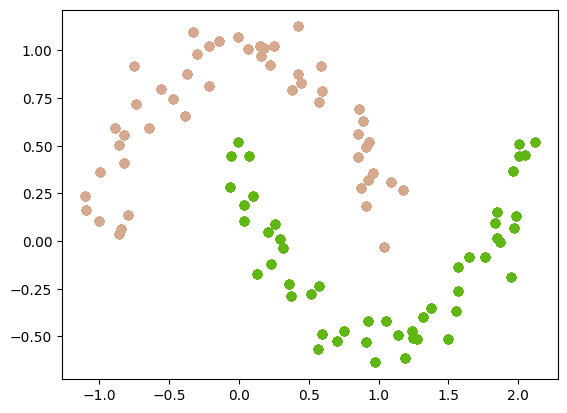

In [136]:
dbscan = DBSCAN(0.3, 2)
dbscan.fit(points)
print("Clusters", dbscan.clusters)

plt.scatter(points[:, 0], points[:, 1], c="black")

for cluster in dbscan.clusters:

    color = (np.random.random(1)[0], np.random.random(1)[0], np.random.random(1)[0])
    pts_to_color = []

    for core in cluster:

        pts_to_color.extend(core.neighbors)

    pts_to_color = np.array(pts_to_color)

    plt.scatter(pts_to_color[:, 0], pts_to_color[:, 1], c=color)